In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Arial',
        'size'   : 12}
matplotlib.rc('font', **font)

In [2]:
# Load metadata
metadata = pd.read_csv("../../results/opa_metadata_locus.csv", index_col = 0)

# Get only isolates that have all 11 opas
num_opa_genes = pd.read_csv('../../results/summary_statistics/num_opa_genes_by_strain.csv', index_col = 0)
full_opa_isolates = num_opa_genes[num_opa_genes['num_opa_genes']==11]['strain'].values
metadata_full_opa = metadata[metadata['strain'].isin(full_opa_isolates)]
metadata_full_opa.reset_index(inplace = True, drop = True)

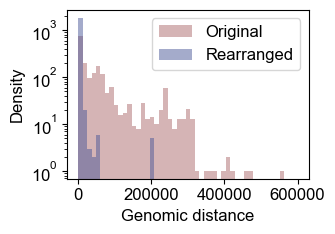

In [5]:
# Get nearest opas to FA1090 opas in original positions
metadata_FA1090 = metadata[metadata['strain'] == 'FA1090']
nearest_df = pd.DataFrame()
for strain, df in metadata_full_opa.groupby('strain'):
    if strain!='FA1090':
        df.sort_values('start', inplace = True, ignore_index = True)
        merged = pd.merge_asof(metadata_FA1090, df, on = 'start', direction = 'nearest')[['id_x', 'id_y', 'start']]
        nearest_df = pd.concat([nearest_df, merged.merge(df[['id', 'start']], left_on = 'id_y', right_on = 'id').drop ('id', axis = 'columns')])
nearest_df.reset_index(inplace = True, drop = True)

# Get nearest opa to FA1090 opas in rearranged positions
nearest_rearranged_df = pd.DataFrame()
for strain, df in metadata_full_opa.groupby('strain'):
    if strain!='FA1090':
        df.sort_values('start_reordered_flipped', inplace = True, ignore_index = True)
        merged = pd.merge_asof(metadata_FA1090, df, on = 'start_reordered_flipped', direction = 'nearest')[['id_x', 'id_y', 'start_reordered_flipped']]
        nearest_rearranged_df = pd.concat([nearest_rearranged_df, merged.merge(df[['id', 'start_reordered_flipped']], left_on = 'id_y', right_on = 'id').drop ('id', axis = 'columns')])
nearest_rearranged_df.reset_index(inplace = True, drop = True)

# Plot figure
plt.figure(figsize = (3.5,2.5))
bins = np.linspace(0, 6*10**5, 50)
original_distances = np.abs(nearest_df['start_x']-nearest_df['start_y'])
rearranged_distances = np.abs(nearest_rearranged_df['start_reordered_flipped_x']-nearest_rearranged_df['start_reordered_flipped_y'])

plt.hist(original_distances, bins = bins, alpha = 0.5, label = 'Original', color = '#ad6a6c')
plt.hist(rearranged_distances, bins = bins, alpha = 0.5, label = 'Rearranged', color = '#4a5899')
plt.yscale('log')
plt.xlabel('Genomic distance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('../../figures/loci/genomic_distances_original_rearranged.png', dpi = 300)
plt.savefig('../../figures/loci/genomic_distances_original_rearranged.pdf')
plt.show()

In [4]:
print('mean original distance: ', round(np.mean(original_distances)))
print('mean rearranged distance: ', round(np.mean(rearranged_distances)))

mean original distance:  59460
mean rearranged distance:  2886
